<a href="https://colab.research.google.com/github/erkansengonul/aiworkstr/blob/main/Data_Manipulation_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#To read the data from a csv file, we use the Pandas method pandas.read_csv()
data = pd.read_csv('/content/drive/MyDrive/Datasets/Kickstarter Projects/ks-projects-201801.csv')

*   **DataFrames** are two-dimensional arrays. These are like your Excel tables with multiple columns and rows and hence, two-dimensional.
*   **Series** are the “columns” in a DataFrame. These objects are one-dimensional only and each can contain only one data type (e.g. strings, floats, datetime, etc.)

In [6]:
type(data)

pandas.core.frame.DataFrame

**Viewing Data**


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


prints out 10 random rows

In [9]:
data.sample(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
337610,789691587,Donald Trump Menstrual Pouch,Graphic Design,Design,USD,2015-09-14,100.0,2015-08-15 23:26:08,233.0,successful,23,US,233.00,233.00,100.00
141897,1720911241,Horse to Horse,Documentary,Film & Video,USD,2015-04-13,15000.0,2015-02-27 04:38:36,0.0,failed,0,US,0.00,0.00,15000.00
13661,1068787797,Prototype for fuel-less Dynamo Vehicle.,Technology,Technology,USD,2015-03-18,150.0,2015-02-11 20:46:57,50.0,failed,2,US,50.00,50.00,150.00
28463,1144393608,Help Fund Our Community Efforts,Art,Art,USD,2016-06-24,5000.0,2016-05-25 23:02:35,210.0,failed,7,US,210.00,210.00,5000.00
18860,1095617948,THE NIGGA PROJECT Experience,Documentary,Film & Video,USD,2014-05-10,6000.0,2014-04-15 22:54:58,26.0,failed,3,US,26.00,26.00,6000.00
257243,378168025,The Man Who Was Thursday - Illustrated with Sc...,Publishing,Publishing,GBP,2017-06-03,4000.0,2017-05-04 03:41:39,35.0,failed,3,GB,0.00,44.63,5101.00
369920,954598956,Art And Anchor,Documentary,Film & Video,USD,2015-03-27,50000.0,2015-02-05 19:02:37,6820.0,failed,27,US,6820.00,6820.00,50000.00
252549,354562343,Project Ethiopia (Suspended),Photography,Photography,USD,2011-09-01,6000.0,2011-08-12 17:37:34,0.0,suspended,0,US,0.00,0.00,6000.00
332178,762216931,dottted. Artistic dotted animals products,Product Design,Design,GBP,2016-03-27,800.0,2016-02-26 13:13:52,619.0,failed,20,GB,862.65,885.77,1144.77
134868,1684580744,Cosplay Fandom Tshirts (Canceled),Fashion,Fashion,USD,2012-07-14,3000.0,2012-05-30 06:13:05,105.0,canceled,5,US,105.00,105.00,3000.00


Likewise, you can use .head(n) and .tail(n) to show n first and last rows, respectively.

In [10]:
data.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [11]:
data.tail(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.0,successful,78,CA,5019.92,4983.69,4529.81
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,NOK,2015-04-28,20000.0,2015-03-29 21:30:33,21500.0,successful,36,NO,2698.97,2875.83,2675.19
378653,999972264,Islanda,Documentary,Film & Video,USD,2012-03-16,1700.0,2012-02-15 04:31:10,25.0,failed,1,US,25.00,25.00,1700.00
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.00,154.00,6500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.0,canceled,0,CA,0.00,0.00,4949.60
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.00,25.00,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.00,155.00,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.00,20.00,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.00,200.00,15000.00
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.00,524.00,2000.00


In [12]:
# Select a Series
# This returns a Series (One-dimensional)
data['ID']

0         1000002330
1         1000003930
2         1000004038
3         1000007540
4         1000011046
             ...    
378656     999976400
378657     999977640
378658     999986353
378659     999987933
378660     999988282
Name: ID, Length: 378661, dtype: int64

In [14]:
# Select multiple Series
# This returns a DataFrame (Two-dimensional)
data[['ID','name']]

,ID,name
0,1000002330,The Songs of Adelaide & Abullah
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET
2,1000004038,Where is Hank?
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album
4,1000011046,Community Film Project: The Art of Neighborhoo...
...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled)
378657,999977640,The Tribe
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...
378659,999987933,BioDefense Education Kit


**Cleaning Data**


**Handling Missing Data**

Pandas has several built-in functions to handle missing data. For example, the method .isnull() filters out the missing values. Combined with the aggregation method .sum() , this will yield the total number of missing values in each Series.

In [16]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In our example, we have 4 missing values in the Series name . We can further investigate what those values are by applying a filter.

In [18]:
data[data['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


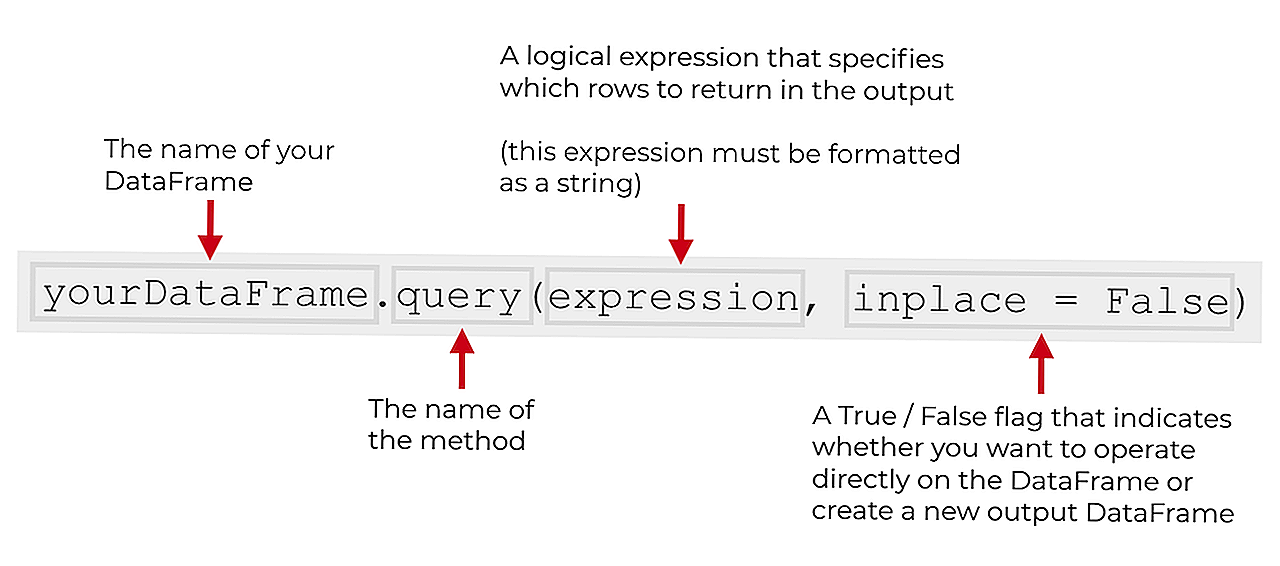

The method *.fillna()* replaces the missing data in the selected Series with a specified value. The argument *inplace = True* tells Pandas to make direct changes to the original DataFrame data. Leaving the argument *inplace = False* per default will instead return a new Series with the missing values filled — instead of applying the changes to the actual DataFramedata .

In [19]:
data['name'].fillna('Unnamed', inplace = True)

In [21]:
data[data['name']=='Unnamed']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,Unnamed,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,Unnamed,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,Unnamed,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,Unnamed,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


**Dropping Series**

Sometimes we might want to exclude some unnecessary Series. One reason for this is that it may improve performance, especially when we work with large datasets. However, careful considerations should be taken when deciding which Series to drop, as you might potentially erase useful information.

In [22]:
data.drop(columns = ['ID','name','currency','goal', 'pledged','usd pledged'], inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378661 non-null  object 
 1   main_category     378661 non-null  object 
 2   deadline          378661 non-null  object 
 3   launched          378661 non-null  object 
 4   state             378661 non-null  object 
 5   backers           378661 non-null  int64  
 6   country           378661 non-null  object 
 7   usd_pledged_real  378661 non-null  float64
 8   usd_goal_real     378661 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 26.0+ MB


**Handling Errors**


**Numerical Data:** Errors in numerical data require various statistical techniques that are probably too overwhelming for this introductory article.

**Categorical Data:** The quickest way to detect errors in categorical data is to print out all unique values.

In [26]:
#Tekil olanları geitiriyor
data['country'].unique()


array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

A slightly better way is to use pandas’ method .value_counts() , which prints out the unique values AND their frequency.


In [27]:
data['country'].value_counts()


US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [28]:
data[data['country'] == 'N,0"'].sample(10)


,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
359240,Music,Music,2015-12-18,2015-11-27 22:59:45,undefined,0,"N,0""",200.00,7000.00
233271,Film & Video,Film & Video,2016-03-27,2016-02-26 16:32:39,undefined,0,"N,0""",2890.55,2861.93
101754,Music,Music,2015-03-21,2015-02-26 07:53:44,undefined,0,"N,0""",8126.00,8000.00
136508,Publishing,Publishing,2016-05-08,2016-03-09 19:53:08,failed,0,"N,0""",0.78,1552.55
93788,Film & Video,Film & Video,2015-03-22,2015-02-24 21:20:25,undefined,0,"N,0""",5550.02,5206.40
225817,Music,Music,2016-02-22,2015-12-24 19:53:53,undefined,0,"N,0""",172.74,1845.56
245038,Film & Video,Film & Video,2015-12-10,2015-11-10 18:40:56,undefined,0,"N,0""",0.00,1095.00
287915,Publishing,Publishing,2015-12-24,2015-11-30 23:07:14,undefined,0,"N,0""",248.74,3604.90
191644,Music,Music,2016-03-31,2016-02-25 22:11:17,undefined,0,"N,0""",8914.00,7500.00
251187,Music,Music,2016-04-23,2016-03-12 19:45:19,undefined,0,"N,0""",663.31,1596.42


These values are errors during data collection (undefined state and 0 backer) and since they account for only ~1% of the whole dataset, we can just drop them.

In [29]:
data = data[data['country'] != 'N,0"']

**Working with Datetime Data**

Datetime data often require different types of treatment. For example, we might want to calculate the duration between two dates or extract a time part (month, year, hour, minute, etc.). Pandas makes these tasks simple with built-in datetime functions.

First, we will need to convert the datetime Series to correct their correct data types.

In [31]:
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          374864 non-null  object        
 1   main_category     374864 non-null  object        
 2   deadline          374864 non-null  datetime64[ns]
 3   launched          374864 non-null  datetime64[ns]
 4   state             374864 non-null  object        
 5   backers           374864 non-null  int64         
 6   country           374864 non-null  object        
 7   usd_pledged_real  374864 non-null  float64       
 8   usd_goal_real     374864 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 28.6+ MB


To extract any datetime component, we use the sub-module dt .


In [39]:
data['launched_year'] = data['launched'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
data['launched_year']

0         2015
1         2017
2         2013
3         2012
4         2015
          ... 
378656    2014
378657    2011
378658    2010
378659    2016
378660    2011
Name: launched_year, Length: 374864, dtype: int64

In [41]:
data['launched_year'].min()


1970

This code returns 1970, which doesn’t make any sense as Kickstarter was founded in 2008! This is obviously an error so we can exclude any rows with launched year less than 2008 from our DataFrame.

In [42]:
data = data[data['launched_year'] >= 2008]


To calculate the duration of the projects, we can just take the difference between deadline and launched Series.


In [43]:
data['duration'] = data['deadline'] - data['launched']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data['duration']

0        58 days 11:47:32
1        59 days 19:16:03
2        44 days 23:39:10
3        29 days 20:35:49
4        55 days 15:24:57
               ...       
378656   29 days 21:24:30
378657   26 days 20:24:46
378658   45 days 04:19:30
378659   30 days 05:46:07
378660   27 days 14:52:13
Name: duration, Length: 374857, dtype: timedelta64[ns]

This performs element-wise subtraction between the two datetime Series and returns a timedelta Series, which we can convert to time component like month or day.

In [45]:
import numpy as np
data['duration'] = data['duration'] // np.timedelta64(1, 'D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data['duration']

0         58
1         59
2         44
3         29
4         55
          ..
378656    29
378657    26
378658    45
378659    30
378660    27
Name: duration, Length: 374857, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374857 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          374857 non-null  object        
 1   main_category     374857 non-null  object        
 2   deadline          374857 non-null  datetime64[ns]
 3   launched          374857 non-null  datetime64[ns]
 4   state             374857 non-null  object        
 5   backers           374857 non-null  int64         
 6   country           374857 non-null  object        
 7   usd_pledged_real  374857 non-null  float64       
 8   usd_goal_real     374857 non-null  float64       
 9   launched_year     374857 non-null  int64         
 10  duration          374857 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 34.3+ MB
